In [1]:
!pip install fuzzy-c-means

In [2]:
# Ignoring the warning
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# Reading dataset
df = pd.read_csv('car.csv', names= ['buying', 'maint', 'door', 'persons', 'lug_boot','safety'])

In [5]:
df.head

<bound method NDFrame.head of           buying    maint     door  persons lug_boot   safety
Column1  Column2  Column3  Column4  Column5  Column6  Column7
vhigh      vhigh        2        2    small      low    unacc
vhigh      vhigh        2        2    small      med    unacc
vhigh      vhigh        2        2    small     high    unacc
vhigh      vhigh        2        2      med      low    unacc
...          ...      ...      ...      ...      ...      ...
low          low    5more     more      med      med     good
low          low    5more     more      med     high    vgood
low          low    5more     more      big      low    unacc
low          low    5more     more      big      med     good
low          low    5more     more      big     high    vgood

[1729 rows x 6 columns]>

In [6]:
# Checking data shape
df.shape

(1729, 6)

In [7]:
df.skew()

Series([], dtype: float64)

ValueError: could not convert string to float: 'Column5'

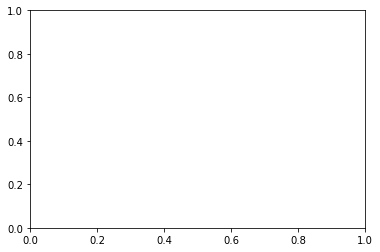

In [10]:
sns.distplot(df['persons'])

ValueError: could not convert string to float: 'Column4'

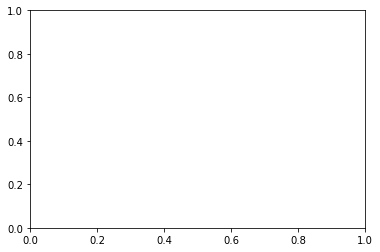

In [11]:
sns.distplot(df['door'])

In [12]:
y = df['maint']
df.drop(columns=['maint'], inplace = True)

In [13]:
df

,buying,door,persons,lug_boot,safety
Column1,Column2,Column4,Column5,Column6,Column7
vhigh,vhigh,2,small,low,unacc
vhigh,vhigh,2,small,med,unacc
vhigh,vhigh,2,small,high,unacc
vhigh,vhigh,2,med,low,unacc
...,...,...,...,...,...
low,low,more,med,med,good
low,low,more,med,high,vgood
low,low,more,big,low,unacc
low,low,more,big,med,good


In [15]:
!pip install normalizer

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for normalizer: filename=normalizer-0.2.1-py3-none-any.whl size=3755 sha256=3358b203c68a1fc0ee7f1e965bf345709b3563918b233c707abc53c15fcdad5e
  Stored in directory: c:\users\young\appdata\local\pip\cache\wheels\cb\50\08\315e8c227c07ff1527d025f89db6f3ef81fefceebddc0b95d7
Successfully built normalizer


In [14]:
!pip install charset-normalizer

In [ ]:
# # Normalizing the features First_exam and Second_exam

# from sklearn.preprocessing import Normalizer

# df = Normalizer().fit_transform(df)

KeyError: "None of [Int64Index([ 330,  331,  332,  333,  334,  335,  336,  337,  338,  339,\n            ...\n            1719, 1720, 1721, 1722, 1723, 1724, 1725, 1726, 1727, 1728],\n           dtype='int64', length=1383)] are in the [columns]"

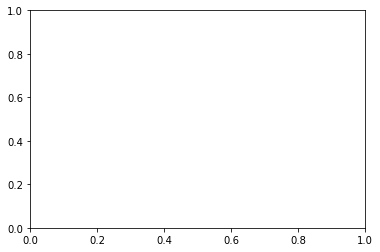

In [16]:
from sklearn.model_selection import StratifiedKFold
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, RocCurveDisplay, classification_report, auc, f1_score, confusion_matrix,roc_curve, ConfusionMatrixDisplay

# Stritified KFold implementation
skf = StratifiedKFold(n_splits=5)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots()

accuracies = list()
predicted_classes = list()
actual_classes = list()

for k, (train_index, test_index) in enumerate(skf.split(df, y)):
    X_train, X_test = df[train_index], df[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Training K means
    kmeans = KMeans(n_clusters=2).fit(X_train)

    # Predicting classes
    y_pred = kmeans.predict(X_test)

    print(y_pred)

    predicted_classes += y_pred.tolist()
    actual_classes += y_test.tolist()

    print(f"Accuracy for fold ${k+1}", accuracy_score(y_test, y_pred))
    RocCurveDisplay.from_predictions(y_test, y_pred)

    conf_mat = confusion_matrix(y_test, y_pred)
    cm_display = ConfusionMatrixDisplay(conf_mat, display_labels=["Admitted", "Not Admitted"]).plot()
    plt.show()

In [ ]:
print("Accuracy :", accuracy_score(actual_classes, predicted_classes))

tn, fp, fn, tp = conf_mat.ravel()
print("Specificity :", (tn / (tn+fp)))
print("Sensitivity :", (tp / (tp+fn)))

fpr, tpr, _ = roc_curve(actual_classes, predicted_classes)
print("Area under curve: ", auc(fpr, tpr))
print(classification_report(actual_classes, predicted_classes, target_names = ['Admitted', 'Not Admitted']))
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
plt.show()

In [ ]:
from fcmeans import FCM

# Stritified KFold implementation
skf = StratifiedKFold(n_splits=5)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots()

accuracies = list()
predicted_classes = list()
actual_classes = list()

for k, (train_index, test_index) in enumerate(skf.split(df, y)):
    X_train, X_test = df[train_index], df[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Training Fuzzy C means
    fcm = FCM(n_clusters=2)
    fcm.fit(X_train)

    # Predicting classes
    y_pred = fcm.predict(X_test)

    predicted_classes += y_pred.tolist()
    actual_classes += y_test.tolist()

    print(f"Accuracy for fold ${k+1}", accuracy_score(y_test, y_pred))
    RocCurveDisplay.from_predictions(y_test, y_pred)

    conf_mat = confusion_matrix(y_test, y_pred)
    cm_display = ConfusionMatrixDisplay(conf_mat, display_labels=["Admitted", "Not Admitted"]).plot()
    plt.show()

In [ ]:
print("Accuracy :", accuracy_score(actual_classes, predicted_classes))

tn, fp, fn, tp = conf_mat.ravel()
print("Specificity :", (tn / (tn+fp)))
print("Sensitivity :", (tp / (tp+fn)))

fpr, tpr, _ = roc_curve(actual_classes, predicted_classes)
print("Area under curve: ", auc(fpr, tpr))
print(classification_report(actual_classes, predicted_classes, target_names = ['Admitted', 'Not Admitted']))
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
plt.show()